<a href="https://colab.research.google.com/github/biorsrch18/Computer-vision/blob/main/CV_Project_Full_Code_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [4]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
#!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

In [5]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # for data visualization


import os
import random
import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer # convert categorical labels into a binary format

# Tensorflow modules
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential #sequential api for sequential model
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding
from tensorflow.keras.optimizers import RMSprop,Adam,SGD #optimiers for optimizing the model
from tensorflow.keras.preprocessing.image import ImageDataGenerator #for data augmentation
from tensorflow.keras.callbacks import ReduceLROnPlateau #reducing the learning rate
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers
from tensorflow.keras.preprocessing import image

import cv2 # Importing openCV for image processing

from google.colab.patches import cv2_imshow


## Loading the dataset

In [7]:
# Uncomment and run the below code if you are using google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
images = np.load('/content/drive/MyDrive/computer_vision/Plant_Images.npy')
labels = pd.read_csv('/content/drive/MyDrive/computer_vision/Plant_Labels.csv')

In [105]:
# conversion to HTML
!jupyter nbconvert --to html /content/drive/MyDrive/computer_vision/CV_Project_Full_Code_Notebook.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/computer_vision/CV_Project_Full_Code_Notebook.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 19 image(s).
[NbConvertApp] Writing 2566870 bytes to /content/drive/MyDrive/computer_vision/CV_Project_Full_Code_Notebook.html


## Data Overview

### Understand the shape of the dataset

In [9]:
print(images.shape)
print(labels.shape)
print ("The number of RGB images are:", images.shape[0])
print ("The shape of images are:", images[0].shape)
print ("The number of channels are:", images[0].shape[2])

(4750, 128, 128, 3)
(4750, 1)
The number of RGB images are: 4750
The shape of images are: (128, 128, 3)
The number of channels are: 3


## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

In [10]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

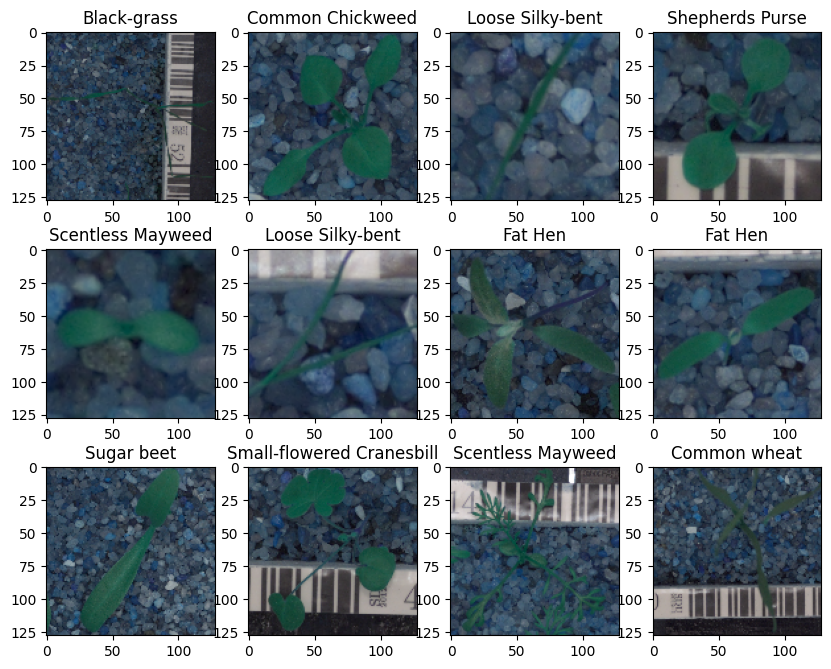

In [11]:
plot_images(images,labels)

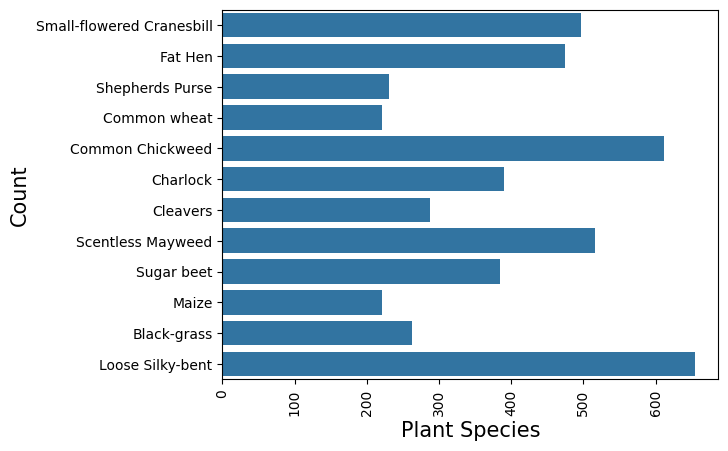

In [12]:
# countplot to understand the distribution of the target variable.
sns.countplot(labels['Label'])
plt.xticks(rotation=90, fontsize=10)
plt.xlabel("Plant Species", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

# Observations
    The dataset appears to be unbalanced in the above plot.
    Common Chickweed, Scentless Mayweed and Loose Silky-bent plant species have around more than 500 images indivially.
    There are between 400 and 500 images for each Small-flowered Cranebill and Fat Hen plant categories.
    There are between 300 and 400 images for each Charlock and Sugar beet categories.
    Shepherds Purse, Common wheat, Maize, Black-grass and Cleavers plant species have around 200 -300 images.


## Data Pre-Processing

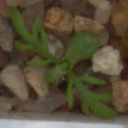

In [13]:
cv2_imshow(images[3000])

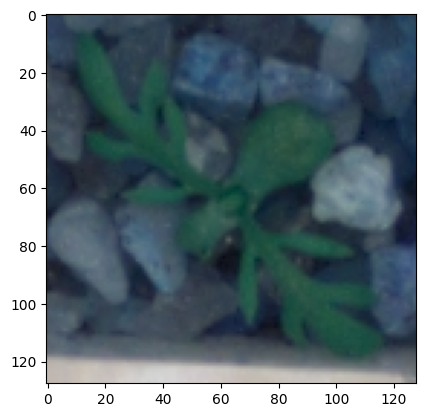

In [14]:
plt.imshow(images[3000])

#Observations:
    1.Since OpenCV reads images in BGR format, we can see that the images plot differently when we use OpenCV and Matplotlib.
    2.This indicates that OpenCV was used to generate the provided numpy arrays from the original images.
    3.To make it easier for us to understand, we will now convert these BGR images to RGB images.

### Convert the BGR images to RGB images.

In [15]:
# convert the images from BGR to RGB using cvtColor() of OpenCV library
for i in range(len(images)): images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

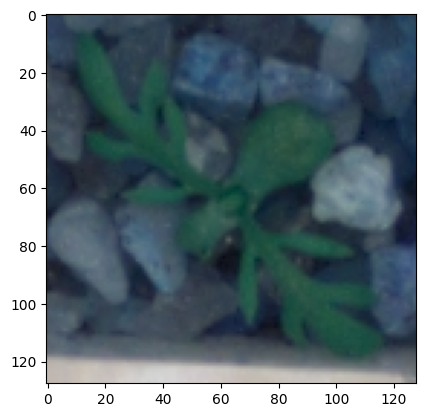

In [16]:
plt.imshow(cv2.cvtColor(images[3000], cv2.COLOR_BGR2RGB))

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

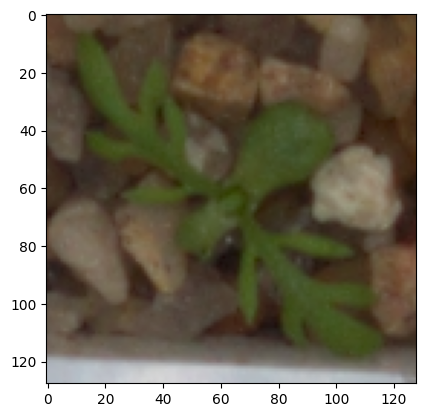

In [17]:
plt.imshow(images[3000])

In [18]:
images_decreased=[]
height = 64
weight =64
dimension = (height, weight)
for i in range(len(images)):
    images_decreased.append(cv2.resize(images[i],(64,64), interpolation=cv2.INTER_LINEAR))

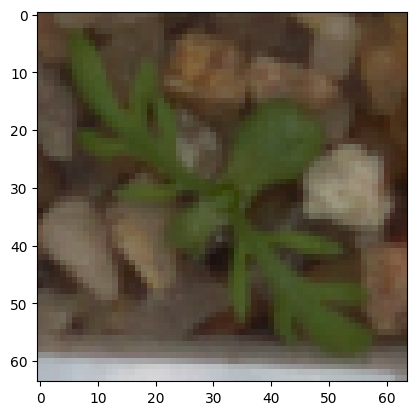

In [19]:
#image after resizing
plt.imshow(images_decreased[3000])

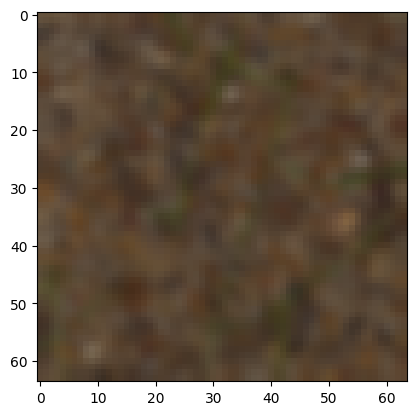

In [20]:
# Using Guassian Blur to denoise the image
image_gsb=[]
for i in range(len(images_decreased)):
    image_gsb.append(cv2.GaussianBlur(images_decreased[i], (5, 5), 0))
    plt.imshow(image_gsb[i])

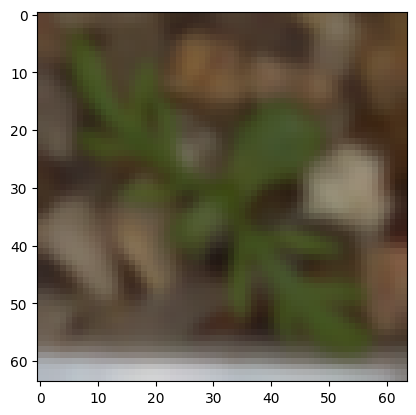

In [21]:
plt.imshow(image_gsb[3000])

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

    #Split data using train_test_split() from scikit-learn into 3 parts : train,test and validation.
    Train set: 70%
    Test & Validation set: 30%

In [22]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased), labels['Label'], test_size=0.15, random_state=42, stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.15, random_state=42, stratify=y_temp)

In [23]:
print("Shape of Training set : ", X_train.shape, y_train.shape)
print("Shape of Test set : ", X_test.shape, y_test.shape)
print("Shape of Validation set : ", X_val.shape, y_val.shape)

Shape of Training set :  (3431, 64, 64, 3) (3431,)
Shape of Test set :  (713, 64, 64, 3) (713,)
Shape of Validation set :  (606, 64, 64, 3) (606,)


### Encode the target labels

In [24]:
# Labelbinarizer to convert categorical labels into a binary format
enc = LabelBinarizer()
y_train_en = enc.fit_transform(y_train)
y_test_en = enc.fit_transform(y_test)
y_val_en = enc.fit_transform(y_val)

### Data Normalization

In [25]:
# to standardize the images we will use scaling method.
X_train_norm = X_train.astype('float32')/255.0
X_test_norm = X_test.astype('float32')/255.0
X_val_norm = X_val.astype('float32')/255.0

In [26]:
print(X_train_norm.shape)
print(X_test_norm.shape)
print(X_val_norm.shape)

(3431, 64, 64, 3)
(713, 64, 64, 3)
(606, 64, 64, 3)


## Model Building
    CNN Model with the following 2 main parts-
    The Feature Extraction layers which are comprised of convolutional and pooling layers.
    The Fully Connected classification layers for prediction.

#    Model_0
    1st conv layer (I/P layer 64 neurons, kernel size 3x3 with  with relu activation function and
    He initialization: for ReLU activations to help with weight distribution.
    2 maxpooling layers
    2 Dense layers
    2 Dropouts

In [27]:
# clears current keras session, resetting all layers and models previously created and clearing up memory and resources
tf.keras.backend.clear_session()

In [28]:
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [29]:
model_0 = Sequential() #Initialize sequential model
model_0.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64, 64, 3))) # Adding first conv layer, Weight initialization, padding.
model_0.add(MaxPooling2D((2, 2), padding='same')) # Adding max pooling to reduce the size of output of first conv layer

model_0.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Adding second conv layer, Weight initialization, padding.
model_0.add(MaxPooling2D((2, 2), padding='same'))

model_0.add(Flatten()) # flattening the output of the conv layer after max pooling to make it ready for creating dense connections

model_0.add(Dense(64, activation='relu', kernel_initializer='he_uniform')) # Adding first dense layer with 64 neurons
model_0.add(Dropout(0.25))

model_0.add(Dense(32, activation='relu', kernel_initializer='he_uniform')) # Adding second dense layer with 32 neurons
model_0.add(Dropout(0.25))

model_0.add(Dense(12, activation='softmax')) # Adding output layer with 12 neurons
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         524,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 12)                  │             396 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 547,084 (2.09 MB)

 Trainable params: 547,084 (2.09 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Optimizer = Adam
optimizer = Adam(learning_rate=0.001)
optimizer= keras.optimizers.Adam()
model_0.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics = ['accuracy'])

In [31]:
# Fitting the model on the train data
history_0 = model_0.fit(X_train_norm, y_train_en, validation_data=(X_val_norm, y_val_en), epochs=50, batch_size=32, verbose=2)

Epoch 1/50
108/108 - 37s - 346ms/step - accuracy: 0.1247 - loss: 2.4829 - val_accuracy: 0.1469 - val_loss: 2.4379
Epoch 2/50
108/108 - 34s - 315ms/step - accuracy: 0.1760 - loss: 2.3710 - val_accuracy: 0.2987 - val_loss: 2.0977
Epoch 3/50
108/108 - 41s - 383ms/step - accuracy: 0.3008 - loss: 1.9903 - val_accuracy: 0.4076 - val_loss: 1.7265
Epoch 4/50
108/108 - 40s - 370ms/step - accuracy: 0.3693 - loss: 1.7955 - val_accuracy: 0.4208 - val_loss: 1.6099
Epoch 5/50
108/108 - 43s - 396ms/step - accuracy: 0.3941 - loss: 1.6708 - val_accuracy: 0.4455 - val_loss: 1.5416
Epoch 6/50
108/108 - 40s - 367ms/step - accuracy: 0.4419 - loss: 1.5473 - val_accuracy: 0.5000 - val_loss: 1.4056
Epoch 7/50
108/108 - 40s - 374ms/step - accuracy: 0.4926 - loss: 1.4311 - val_accuracy: 0.5380 - val_loss: 1.3196
Epoch 8/50
108/108 - 42s - 386ms/step - accuracy: 0.5340 - loss: 1.3166 - val_accuracy: 0.5462 - val_loss: 1.3142
Epoch 9/50
108/108 - 41s - 376ms/step - accuracy: 0.5689 - loss: 1.2273 - val_accuracy: 

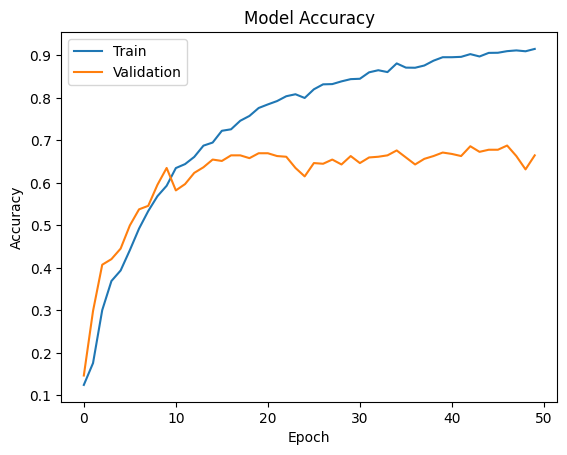

In [32]:
plt.plot(history_0.history['accuracy'], label='accuracy')
plt.plot(history_0.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [33]:
#Evaluate model on test data
accuracy = model_0.evaluate(X_test_norm, y_test_en, verbose=2)

23/23 - 2s - 74ms/step - accuracy: 0.6339 - loss: 2.0318


In [37]:
# Generate prediction using test data
y_pred_model_0 = model_0.predict(X_test_norm)
y_pred_model_0

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


array([[9.9998480e-01, 4.8386206e-30, 7.4616328e-28, ..., 2.5998150e-38,
        5.7690364e-25, 1.3951902e-30],
       [8.7214661e-01, 2.4665494e-18, 1.8227567e-16, ..., 1.8584110e-22,
        1.8093881e-14, 1.4115771e-17],
       [4.6141349e-10, 1.6714649e-01, 7.3592653e-03, ..., 9.0634741e-04,
        8.3722489e-07, 1.8284520e-05],
       ...,
       [3.1427758e-09, 6.6594618e-36, 2.1480869e-34, ..., 1.6616085e-29,
        1.6176615e-19, 4.4912672e-25],
       [4.3561847e-14, 9.3803467e-16, 3.0012685e-20, ..., 9.3185790e-02,
        3.4891174e-05, 7.3607938e-09],
       [2.7299635e-03, 1.5515201e-07, 2.8065963e-02, ..., 4.4015047e-05,
        2.2220886e-06, 2.8238302e-02]], dtype=float32)

In [38]:
## calculating categorical values from y_test_encoded and y_pred
y_pred_model_0=np.argmax(y_pred_model_0, axis=1)
y_test_arg=np.argmax(y_test_en, axis=1)

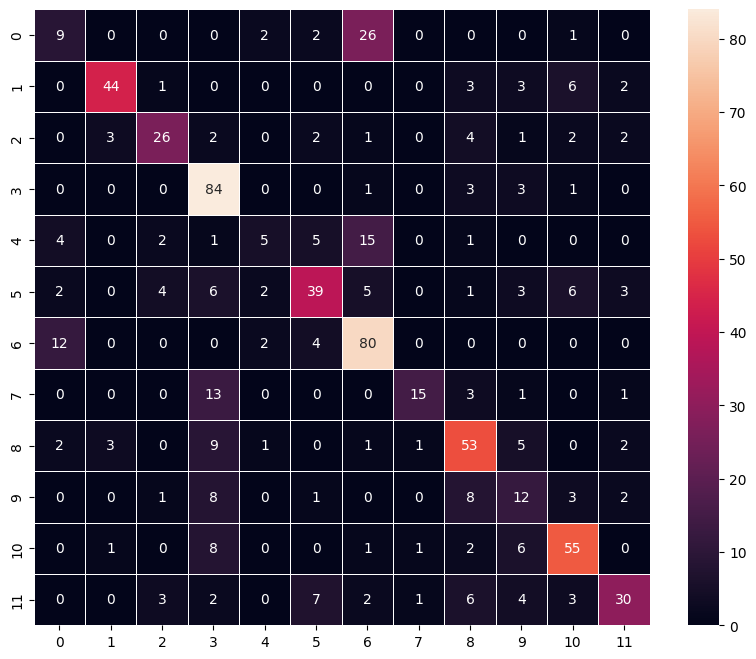

In [39]:
# Confusion matrix plot
cm = tf.math.confusion_matrix(y_test_arg,y_pred_model_0)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

# Observations_Model_0
    Total params: 547084 (2.09 MB)
    Trainable params: 547084 (2.09 MB)
    At epoch=50, training accuracy is 91.5% and validation accuracy is 66% which shows overfitted data.

    Confusion Matrix_observation
    Class 3, 6, 8, and 10, indicating they are well-classified, while We observe that some of the classes are not predicted correctly.
    Class 0 has a significant misclassification into class 5, and class 6 is misclassified into class 0 quite often.
    

# Model_m0 [Reduced Learning Rate]

## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [40]:
# Code to monitor val_accuracy
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [41]:
history_m0 = model_0.fit(X_train_norm, y_train_en, validation_data=(X_val_norm, y_val_en), epochs=50, batch_size=32, verbose=2, callbacks=[lr_reduction])

Epoch 1/50
108/108 - 29s - 266ms/step - accuracy: 0.9152 - loss: 0.2374 - val_accuracy: 0.6815 - val_loss: 1.9900 - learning_rate: 0.0010
Epoch 2/50
108/108 - 40s - 373ms/step - accuracy: 0.9102 - loss: 0.2587 - val_accuracy: 0.6601 - val_loss: 2.0444 - learning_rate: 0.0010
Epoch 3/50
108/108 - 41s - 383ms/step - accuracy: 0.9204 - loss: 0.2447 - val_accuracy: 0.6469 - val_loss: 2.0452 - learning_rate: 0.0010
Epoch 4/50

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
108/108 - 43s - 396ms/step - accuracy: 0.9219 - loss: 0.2275 - val_accuracy: 0.6667 - val_loss: 2.2692 - learning_rate: 0.0010
Epoch 5/50
108/108 - 39s - 361ms/step - accuracy: 0.9166 - loss: 0.2386 - val_accuracy: 0.6733 - val_loss: 1.8601 - learning_rate: 5.0000e-04
Epoch 6/50
108/108 - 41s - 381ms/step - accuracy: 0.9295 - loss: 0.2000 - val_accuracy: 0.6782 - val_loss: 1.9240 - learning_rate: 5.0000e-04
Epoch 7/50

Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

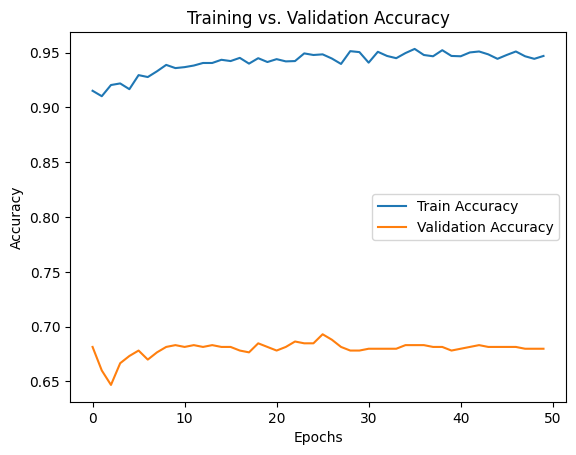

In [42]:
# Plot training & validation accuracy
plt.plot(history_m0.history['accuracy'], label='Train Accuracy')
plt.plot(history_m0.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')
plt.show()

In [72]:
#Evaluate model on test data
accuracy = model_0.evaluate(X_test_norm, y_test_en, verbose=2)

23/23 - 2s - 97ms/step - accuracy: 0.6676 - loss: 2.2270


In [79]:
# Generate prediction using test data
y_pred_m0 = model_0.predict(X_test_norm)
y_pred_m0

23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step


array([[9.9999875e-01, 6.4134082e-35, 1.8966263e-33, ..., 0.0000000e+00,
        2.5205591e-27, 2.1293016e-36],
       [9.8562455e-01, 8.6129445e-18, 7.5861017e-16, ..., 1.4743238e-23,
        3.1502846e-14, 2.7854503e-18],
       [4.4941237e-13, 1.6890734e-01, 3.4021640e-03, ..., 6.8756899e-06,
        7.4673129e-10, 7.2851325e-09],
       ...,
       [4.0728154e-12, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.5126026e-26, 2.2850024e-36],
       [2.9674594e-12, 1.4963574e-14, 2.9366066e-18, ..., 9.6778817e-02,
        1.8931734e-05, 6.1257822e-08],
       [5.2312527e-05, 9.8812278e-13, 8.1772319e-05, ..., 1.6892068e-08,
        5.6237046e-09, 2.3921179e-05]], dtype=float32)

In [81]:
## calculating categorical values from y_test_encoded and y_pred
y_pred_m0=np.argmax(y_pred_m0, axis=1)
y_test_arg=np.argmax(y_test_en, axis=1)

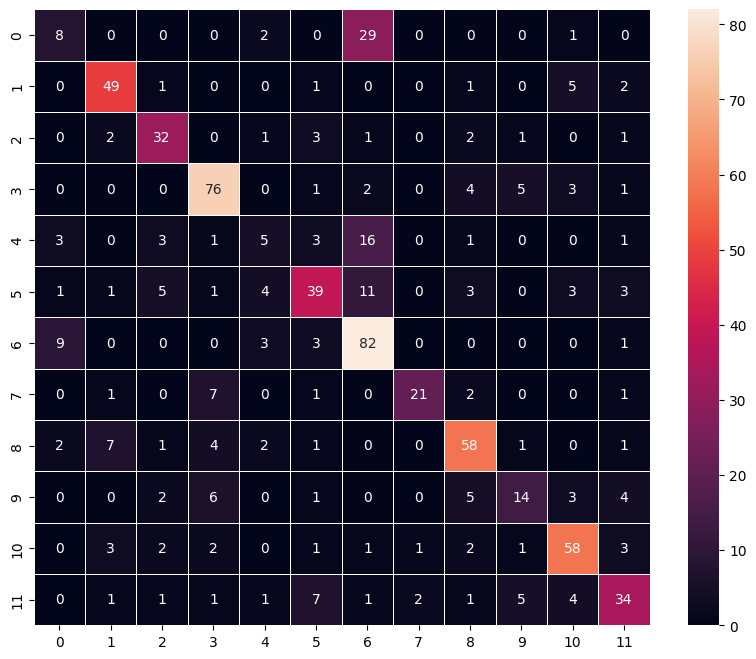

In [82]:
# Confusion matrix plot
cm0 = tf.math.confusion_matrix(y_test_arg,y_pred_m0)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    cm0,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

# Observation_m0 [Reduced Learning Rate]
    Training Accuracy: 94%
    Validation Accuracy: 67%

    There is a huge gap between 94% and 67%, which is showing overfitting data.

    Solutions:
    Early stopping or
    Dropout =0.5 or
    Data Augmentation or
    VGG16, ResNet(Transfer learning)

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [43]:
# clears current keras session, resetting all layers and models previously created and clearing up memory and resources
tf.keras.backend.clear_session()

In [44]:
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [45]:
#Data augmentation parameters, the train datagen()- model fitting for above built models
datagen = ImageDataGenerator(rotation_range=20,         # Rotate images up to 20 degrees
                               width_shift_range=0.1,     # Shift images horizontally by up to 10% of the width
                               height_shift_range=0.1,    # Shift images vertically by up to 10% of the height
                               horizontal_flip=True,      # Randomly flip images
                               vertical_flip=False,        # Randomly flip images
                               zoom_range=0.1,               # Zoom up to 10%
                               fill_mode='nearest')        # Fill any missing pixels with the nearest value

# Fit augmentaionto training data
datagen.fit(X_train_norm)

In [46]:
# Intializing a sequential model
model_1 = Sequential()
model_1.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
model_1.add(MaxPooling2D((2, 2), padding='same'))

model_1.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_1.add(MaxPooling2D((2, 2), padding='same'))
model_1.add(BatchNormalization())

model_1.add(Flatten())    # flattening the output of the conv layer after max pooling to make it ready for creating dense connections


model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.35))

model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.35))

model_1.add(Dense(32, activation='relu'))

model_1.add(Dense(12, activation='softmax'))

model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         524,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 12)                  │             396 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 551,372 (2.10 MB)

 Trainable params: 551,308 (2.10 MB)

 Non-trainable params: 64 (256.00 B)

In [47]:
optimizer = Adam(learning_rate=0.001)
optimizer= keras.optimizers.Adam()
model_1.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics = ['accuracy'])

In [48]:
# Fitting the model on the train data
history_1 = model_1.fit(datagen.flow(X_train_norm, y_train_en), validation_data=(X_val_norm, y_val_en), epochs=80, batch_size=32, verbose=2)

Epoch 1/80
108/108 - 38s - 348ms/step - accuracy: 0.2171 - loss: 2.2365 - val_accuracy: 0.2162 - val_loss: 2.3994
Epoch 2/80
108/108 - 32s - 298ms/step - accuracy: 0.3430 - loss: 1.8422 - val_accuracy: 0.2525 - val_loss: 2.2040
Epoch 3/80
108/108 - 34s - 317ms/step - accuracy: 0.3856 - loss: 1.7606 - val_accuracy: 0.3003 - val_loss: 2.0543
Epoch 4/80
108/108 - 33s - 305ms/step - accuracy: 0.4098 - loss: 1.6809 - val_accuracy: 0.3746 - val_loss: 1.9245
Epoch 5/80
108/108 - 32s - 293ms/step - accuracy: 0.4541 - loss: 1.5487 - val_accuracy: 0.5363 - val_loss: 1.5229
Epoch 6/80
108/108 - 32s - 292ms/step - accuracy: 0.4806 - loss: 1.4836 - val_accuracy: 0.3564 - val_loss: 1.7661
Epoch 7/80
108/108 - 35s - 324ms/step - accuracy: 0.4882 - loss: 1.4494 - val_accuracy: 0.4373 - val_loss: 1.6491
Epoch 8/80
108/108 - 32s - 292ms/step - accuracy: 0.5080 - loss: 1.3984 - val_accuracy: 0.2607 - val_loss: 4.8170
Epoch 9/80
108/108 - 32s - 292ms/step - accuracy: 0.5173 - loss: 1.3821 - val_accuracy: 

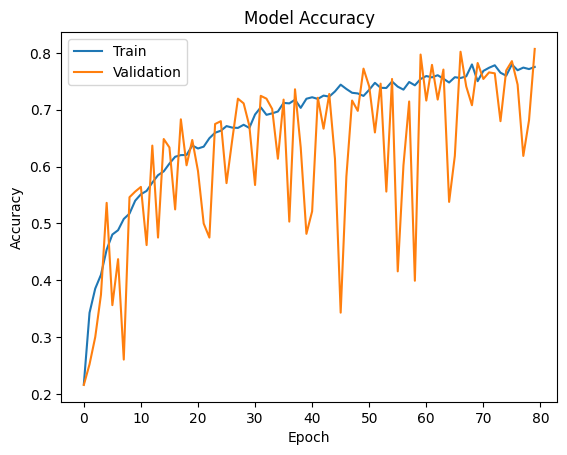

In [49]:
plt.plot(history_1.history['accuracy'], label ='accuracy')
plt.plot(history_1.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [51]:
#Evaluate model on test data
accuracy = model_1.evaluate(X_test_norm, y_test_en, verbose=2)

23/23 - 1s - 51ms/step - accuracy: 0.8359 - loss: 0.5272


# Observations
    Total params: 551,372
    Trainable params: 551,308
    Non-trainable params: 64
    
    Training Accuracy is 77.5%: this model correctly classifies about 77.53% of the training data.
    
    Training Loss is 66.5%: This indicates the error in predictions on the training dataset. A lower value is generally better.
    
    Validation Accuracy is 80.6%: Model correctly classifies about 80.69% of the validation data, suggesting decent generalization.
    
    Validation Loss is 53.8%: The error in predictions on the validation dataset is lower than the training loss.
    This shows the model is learning well.

In [52]:
# Generate prediction using test data
y_pred_model_1 = model_1.predict(X_test_norm)
y_pred_model_1

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step


array([[4.2928141e-01, 1.4166116e-06, 1.8365652e-04, ..., 3.9492020e-06,
        2.7967644e-05, 8.4267557e-04],
       [4.9342221e-01, 4.2999747e-07, 7.0140930e-05, ..., 2.3390523e-06,
        2.1061172e-05, 8.1365765e-04],
       [1.2406935e-07, 3.0388500e-04, 8.8919699e-04, ..., 2.5666011e-02,
        1.6348567e-03, 4.6815734e-05],
       ...,
       [1.5116222e-01, 9.9699451e-14, 2.9609557e-09, ..., 1.1603371e-12,
        4.1438290e-11, 3.1291680e-07],
       [9.2008916e-09, 5.7569913e-09, 3.0627274e-09, ..., 1.3549657e-03,
        8.0634432e-05, 1.4157514e-05],
       [1.6418024e-05, 1.1955517e-06, 2.7124588e-05, ..., 7.7699751e-06,
        3.9005503e-05, 3.7724145e-03]], dtype=float32)

In [53]:
# calculating categorical values from y_test_encoded and y_pred
y_pred_model_1=np.argmax(y_pred_model_1, axis=1)
y_test_arg=np.argmax(y_test_en, axis=1)

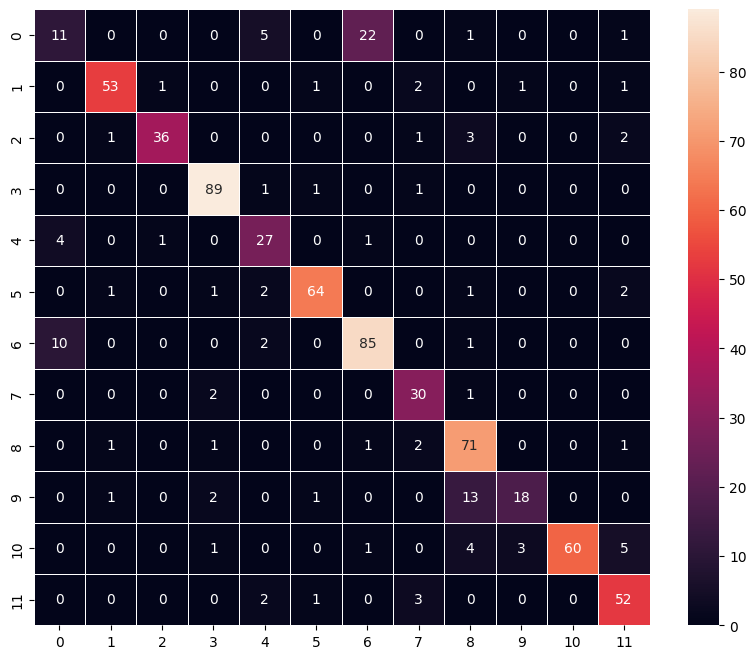

In [54]:
# Confusion matrix plot
cm1 = tf.math.confusion_matrix(y_test_arg,y_pred_model_1)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    cm1,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

## Observation_Model_1

    Generalization is Good
    
    The validation accuracy is higher than the training accuracy, and
    the validation loss is lower than the training loss.
    This suggests that the model is 'not overfitting' and,
    
    possibly 'underfitted model' since the training accuracy is relatively lower, the model might benefit from further training, hyperparameter tuning, or a more complex architecture.


    The confusion matrix appears to be improving as well, however there is still some confusion between classes 0 and 6.
    For this model the 6 class is the most confused class among all.
    We can observe that this model has outperformed our previous model.

# Model_2 "Transfer Learning using VGG16"


In [55]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

In [56]:
vgg_model_2 = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
vgg_model_2.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
# Freezing all non-trainable layers of the VGG model
for layer in vgg_model_2.layers:
    layer.trainable = False # Freeze initial layers


In [59]:
# clears current keras session, resetting all layers and models previously created and clearing up memory and resources
tf.keras.backend.clear_session()

In [60]:
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [61]:
model_2 = Sequential()
model_2.add(vgg_model_2)        # Adding the convolutional part of the VGG16 model from above

model_2.add(Flatten())          # Flattening the output of the VGG16 model because it is from a convolutional layer

# Adding a dense output layer
model_2.add(Dense(64, activation='relu'))
model_2.add(Dropout(0.5))

model_2.add(Dense(32, activation='relu'))
model_2.add(Dropout(0.5))

model_2.add(Dense(32, activation= 'relu'))
model_2.add(Dense(12, activation='softmax'))

model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 2, 2, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 12)                  │             396 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,849,356 (56.65 MB)

 Trainable params: 134,668 (526.05 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [63]:
# Optimizer = Adam
optimizer = Adam(learning_rate=0.0001)
optimizer= keras.optimizers.Adam()
model_2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics = ['accuracy'])

In [65]:
history_2_vgg = model_2.fit(datagen.flow(X_train_norm, y_train_en), validation_data=(X_val_norm, y_val_en), epochs=80, batch_size=32, verbose=2)

Epoch 1/80
108/108 - 197s - 2s/step - accuracy: 0.1186 - loss: 2.4708 - val_accuracy: 0.1931 - val_loss: 2.4029
Epoch 2/80
108/108 - 192s - 2s/step - accuracy: 0.1801 - loss: 2.3652 - val_accuracy: 0.2277 - val_loss: 2.2848
Epoch 3/80
108/108 - 176s - 2s/step - accuracy: 0.2233 - loss: 2.2319 - val_accuracy: 0.2921 - val_loss: 2.1322
Epoch 4/80
108/108 - 203s - 2s/step - accuracy: 0.2746 - loss: 2.0927 - val_accuracy: 0.3152 - val_loss: 1.9669
Epoch 5/80
108/108 - 191s - 2s/step - accuracy: 0.2932 - loss: 2.0102 - val_accuracy: 0.3333 - val_loss: 1.8946
Epoch 6/80
108/108 - 192s - 2s/step - accuracy: 0.2970 - loss: 1.9623 - val_accuracy: 0.3234 - val_loss: 1.8597
Epoch 7/80
108/108 - 203s - 2s/step - accuracy: 0.3200 - loss: 1.8920 - val_accuracy: 0.3284 - val_loss: 1.7919
Epoch 8/80
108/108 - 177s - 2s/step - accuracy: 0.3092 - loss: 1.8808 - val_accuracy: 0.3383 - val_loss: 1.7733
Epoch 9/80
108/108 - 192s - 2s/step - accuracy: 0.3200 - loss: 1.8534 - val_accuracy: 0.3416 - val_loss:

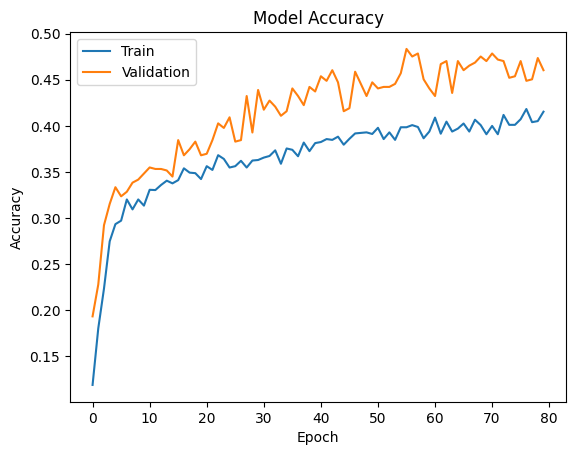

In [67]:
plt.plot(history_2_vgg.history['accuracy'], label='accuracy')
plt.plot(history_2_vgg.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [68]:
#Evaluate model on test data
accuracy = model_2.evaluate(X_test_norm, y_test_en,verbose=2)

23/23 - 33s - 1s/step - accuracy: 0.4670 - loss: 1.5388


In [69]:
y_pred_model_2 = model_2.predict(X_test_norm)
y_pred_model_2

23/23 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step


array([[2.94977129e-01, 7.47585813e-11, 1.77320601e-06, ...,
        4.00232913e-09, 1.19152165e-13, 4.07755520e-04],
       [2.84859568e-01, 9.11111880e-11, 2.71060298e-06, ...,
        7.13376469e-09, 1.97800679e-13, 5.49439981e-04],
       [8.93902761e-05, 1.99050596e-03, 1.22007187e-02, ...,
        1.36315703e-01, 6.90240264e-02, 3.97935323e-02],
       ...,
       [1.84030086e-01, 2.10804624e-10, 2.78515290e-05, ...,
        1.92284517e-07, 1.43605115e-12, 1.37532584e-03],
       [2.22521412e-05, 1.18973795e-02, 1.10872118e-02, ...,
        1.31965876e-01, 3.20929050e-01, 5.98140284e-02],
       [2.52006575e-03, 1.67593348e-03, 2.50581857e-02, ...,
        5.67045473e-02, 5.83097432e-03, 2.80025482e-01]], dtype=float32)

In [70]:
# calculating categorical values from y_test_encoded and y_pred
y_pred_model_2=np.argmax(y_pred_model_2, axis=1)
y_test_arg=np.argmax(y_test_en, axis=1)

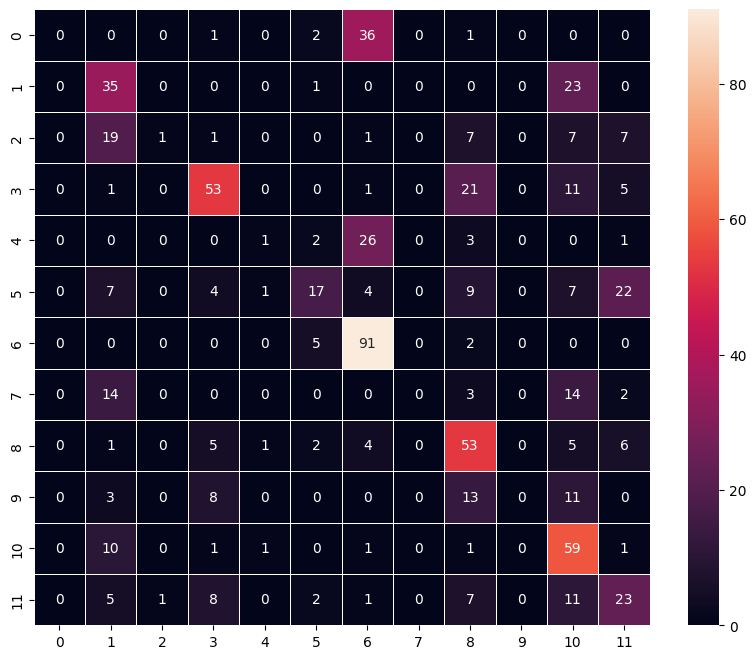

In [71]:
# Confusion matrix plot
cm2 = tf.math.confusion_matrix(y_test_arg,y_pred_model_2)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    cm2,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

# Observations:
    
    Our model has 14,849,356 parameters. The model has 134,668 trainable parameters. Non trainable parameters 14,714,688.
    After running 80 epochs, **we were able to achieve a training accuracy of ~41.5% and a testing accuracy of ~46.7%.
    The model is performing somewhat poorly due to only ~41.5% of accuracy but it is generalizing.
    
    
    Training accuracy is 41.5%.
    Validation Accuracy: 46.04%.
    
    The model is likely underfitting, struggling to learn useful features.
    Need to increase the model complexity, tuning hyperparameters, and ensuring a balanced dataset.

    Validation Loss is High (1.54)
    A high loss indicates the model is not making confident predictions.
    The loss should ideally decrease over epochs, but if it's still high, the model isn't learning properly.

    Confusion matrix is also showing so many misclassifications.

## Final Model [Model_1 [Data Augmentation] ]

    Model_1 [Data Augmentation] is the best model out of all 4 models as it has the highest test accuracy score (83.5%).  

    This means model_1 generalizes well, so this is our final model.

In [78]:
from sklearn.metrics import classification_report
print(classification_report((y_test_arg), y_pred_model_0))

              precision    recall  f1-score   support

           0       0.31      0.23      0.26        40
           1       0.86      0.75      0.80        59
           2       0.70      0.60      0.65        43
           3       0.63      0.91      0.75        92
           4       0.42      0.15      0.22        33
           5       0.65      0.55      0.60        71
           6       0.61      0.82      0.70        98
           7       0.83      0.45      0.59        33
           8       0.63      0.69      0.66        77
           9       0.32      0.34      0.33        35
          10       0.71      0.74      0.73        74
          11       0.71      0.52      0.60        58

    accuracy                           0.63       713
   macro avg       0.62      0.56      0.57       713
weighted avg       0.63      0.63      0.62       713



In [83]:
print(classification_report((y_test_arg), y_pred_m0))

              precision    recall  f1-score   support

           0       0.35      0.20      0.25        40
           1       0.77      0.83      0.80        59
           2       0.68      0.74      0.71        43
           3       0.78      0.83      0.80        92
           4       0.28      0.15      0.20        33
           5       0.64      0.55      0.59        71
           6       0.57      0.84      0.68        98
           7       0.88      0.64      0.74        33
           8       0.73      0.75      0.74        77
           9       0.52      0.40      0.45        35
          10       0.75      0.78      0.77        74
          11       0.65      0.59      0.62        58

    accuracy                           0.67       713
   macro avg       0.63      0.61      0.61       713
weighted avg       0.66      0.67      0.65       713



In [84]:
print(classification_report((y_test_arg), y_pred_model_1))

              precision    recall  f1-score   support

           0       0.44      0.28      0.34        40
           1       0.93      0.90      0.91        59
           2       0.95      0.84      0.89        43
           3       0.93      0.97      0.95        92
           4       0.69      0.82      0.75        33
           5       0.94      0.90      0.92        71
           6       0.77      0.87      0.82        98
           7       0.77      0.91      0.83        33
           8       0.75      0.92      0.83        77
           9       0.82      0.51      0.63        35
          10       1.00      0.81      0.90        74
          11       0.81      0.90      0.85        58

    accuracy                           0.84       713
   macro avg       0.82      0.80      0.80       713
weighted avg       0.84      0.84      0.83       713



In [85]:
print(classification_report((y_test_arg), y_pred_model_2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.37      0.59      0.45        59
           2       0.50      0.02      0.04        43
           3       0.65      0.58      0.61        92
           4       0.25      0.03      0.05        33
           5       0.55      0.24      0.33        71
           6       0.55      0.93      0.69        98
           7       0.00      0.00      0.00        33
           8       0.44      0.69      0.54        77
           9       0.00      0.00      0.00        35
          10       0.40      0.80      0.53        74
          11       0.34      0.40      0.37        58

    accuracy                           0.47       713
   macro avg       0.34      0.36      0.30       713
weighted avg       0.40      0.47      0.39       713



In [101]:
# Creating a DataFrame with properly structured accuracy values
df = pd.DataFrame({
    'Models': [ 'Base CNN Model', 'CNN Model with Reduced LR', 'CNN Model with Data Augmentation', 'Transfer Learning Model'], 'Train Accuracy': ['91.5', '94.7', '77.5', '41.5'],
    'Validation Accuracy': ['66.5', '67.9', '80.6', '46.0'], 'Test Accuracy': ['63.3', '66.7', '83.5', '46.7']})
print(df)

                             Models Train Accuracy Validation Accuracy  \
0                    Base CNN Model           91.5                66.5   
1         CNN Model with Reduced LR           94.7                67.9   
2  CNN Model with Data Augmentation           77.5                80.6   
3           Transfer Learning Model           41.5                46.0   

  Test Accuracy  
0          63.3  
1          66.7  
2          83.5  
3          46.7  


### Visualizing the prediction

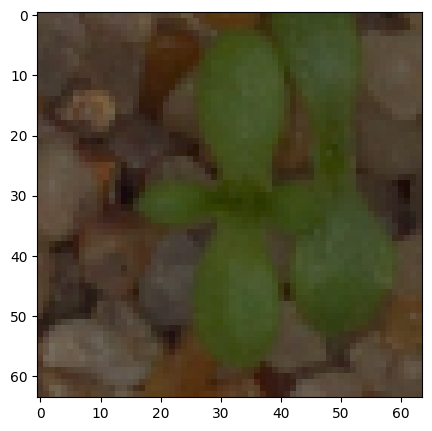

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted Label ['Scentless Mayweed']
True Label Scentless Mayweed


In [98]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(5,5))
plt.imshow(X_test[300])
plt.show()
print('Predicted Label', enc.inverse_transform(model_1.predict((X_test_norm[300].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_en)[2])

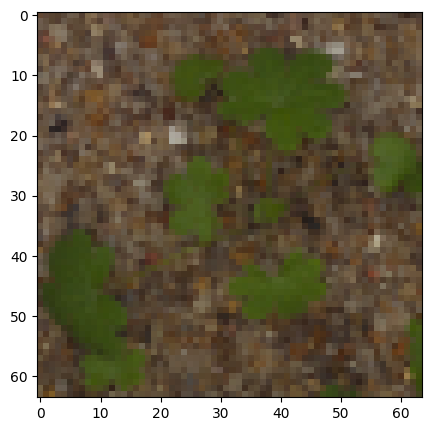

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Scentless Mayweed


In [100]:
plt.figure(figsize=(5,5))
plt.imshow(X_test[200])
plt.show()
print('Predicted Label', enc.inverse_transform(model_1.predict((X_test_norm[200].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_en)[2])

# Observations



## Actionable Insights and Business Recommendations
    
    Actionable Insights:

    1.Base CNN Model(Model_0 and model with reduced LR), both were showing overfitted performance in their models.
    so, data augmentation and Transfer learning(VGG16) methods were applied.
    
    2.Model_1 [Data Augmentation] is the best model out of all 4 models as it has the highest test accuracy score (83.5%).
    This means model_1 generalizes well, so this is our final model.
    
    3.Transfer learning showed underfitted model problem.
    Vgg16 model showed lowest performance of all metrics.
    
        
    
    Business Recommendations:

    1.Deploy the CNN Model with Data Augmentation.
    It has the best test accuracy (83.5%), meaning reliable real-world performance.
    Conduct further validation on unseen datasets before final deployment.

    2.Also, look for other solutions as well for rest of the models
    
    (i).Continue Optimizing the Model with Regularization & Data Augmentation

    (ii).Fix overfitting in the base models with Dropout, L2 regularization, and augmentation.

    (iii).Transfer Learning Models  like ResNet can also be tried to see if we can get better perfomance models before deployement.

*

_____